In [4]:
# All Necessary Imports
# !pip install keras==2.12.0
# !pip install tensorflow==2.12.0

^C


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
!python --version

Python 3.6.13 :: Anaconda, Inc.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
import seaborn as sns
import statistics as stat
from sklearn.model_selection import train_test_split , KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report, roc_curve, auc, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from tensorflow.python.client import device_lib
import pickle
import time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import recall_score, make_scorer, mean_squared_error, confusion_matrix, roc_curve, auc, accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import learning_curve

In [3]:
def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())

['/device:CPU:0']


# New Section

In [4]:
# from google.colab import drive

# drive.mount('/content/drive')

In [4]:
df = pd.read_csv('tf-ft-eng.csv')
weather_data = pd.read_csv('weatherstats_toronto_daily.csv')
df.head()
weather_data.columns

Index(['date', 'max_temperature', 'avg_hourly_temperature', 'avg_temperature',
       'min_temperature', 'max_humidex', 'min_windchill',
       'max_relative_humidity', 'avg_hourly_relative_humidity',
       'avg_relative_humidity', 'min_relative_humidity', 'max_dew_point',
       'avg_hourly_dew_point', 'avg_dew_point', 'min_dew_point',
       'max_wind_speed', 'avg_hourly_wind_speed', 'avg_wind_speed',
       'min_wind_speed', 'max_wind_gust', 'wind_gust_dir_10s',
       'max_pressure_sea', 'avg_hourly_pressure_sea', 'avg_pressure_sea',
       'min_pressure_sea', 'max_pressure_station',
       'avg_hourly_pressure_station', 'avg_pressure_station',
       'min_pressure_station', 'max_visibility', 'avg_hourly_visibility',
       'avg_visibility', 'min_visibility', 'max_health_index',
       'avg_hourly_health_index', 'avg_health_index', 'min_health_index',
       'heatdegdays', 'cooldegdays', 'growdegdays_5', 'growdegdays_7',
       'growdegdays_10', 'precipitation', 'rain', 'snow', 's

# Data PreProcessing

In [5]:
weather_data.columns
selected_columns = [col for col in weather_data.columns if any(substring in col for substring in ['avg', 'date', 'snow', 'rain', 'precipitation'])]
weather_data = weather_data[selected_columns]
# weather_data.columns
weather_filtered_df = weather_data[(weather_data['date'] >= '2022-02-02') & (weather_data['date'] <= '2024-01-31')]
weather_filtered_df.drop(columns=["avg_hourly_health_index", "avg_health_index", "avg_hourly_cloud_cover_4",
                                  "avg_cloud_cover_4", "avg_hourly_cloud_cover_8", "avg_cloud_cover_8", "avg_hourly_cloud_cover_10",
                                  "avg_cloud_cover_10"], inplace=True)
weather_filtered_df.fillna(0, inplace=True)
weather_filtered_df.isnull().sum()
weather_filtered_df.drop(columns=["avg_hourly_dew_point", "avg_hourly_wind_speed",
                                  "avg_hourly_visibility", "avg_hourly_pressure_sea",
                                  "avg_pressure_sea", "avg_hourly_dew_point", "avg_hourly_wind_speed",
                                  "avg_hourly_relative_humidity", "avg_hourly_temperature", "avg_pressure_station",
                                  "avg_hourly_pressure_station"], inplace=True)
weather_filtered_df.isnull().sum()
# weather_filtered_df

C:\Users\roal8\anaconda3\envs\gpu_accel\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\roal8\anaconda3\envs\gpu_accel\lib\site-packages\pandas\core\frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


date                     0
avg_temperature          0
avg_relative_humidity    0
avg_dew_point            0
avg_wind_speed           0
avg_visibility           0
precipitation            0
rain                     0
snow                     0
snow_on_ground           0
dtype: int64

In [6]:
# Import the csv
# df = pd.read_csv("data.csv")
print(df.columns)
df.drop(columns=["WKT", "CSDUID","traffic_camera"], inplace=True)
df = df[df['traffic_source'] == 'Toronto']
df.drop(columns="traffic_source", inplace=True) # Drop the toronto column
print(df.isnull().sum())
# Drop the irrelevant columns and the irrelevant locations
print("The total number of Row = {}".format(df.shape[0]))

Index(['WKT', 'CSDUID', 'traffic_camera', 'traffic_source', 'camera_road',
       'x2022_02_02', 'x2022_02_03', 'x2022_02_04', 'x2022_02_05',
       'x2022_02_06',
       ...
       'x2024_01_22', 'x2024_01_23', 'x2024_01_24', 'x2024_01_25',
       'x2024_01_26', 'x2024_01_27', 'x2024_01_28', 'x2024_01_29',
       'x2024_01_30', 'x2024_01_31'],
      dtype='object', length=734)
camera_road      0
x2022_02_02    315
x2022_02_03     65
x2022_02_04     65
x2022_02_05     68
              ... 
x2024_01_27     21
x2024_01_28     21
x2024_01_29     21
x2024_01_30     21
x2024_01_31     18
Length: 730, dtype: int64
The total number of Row = 315


In [7]:
# Encoding of the street intersections
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
# Apply label encoding to categorical features
label_encoder = LabelEncoder()
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

df.head()

,camera_road,x2022_02_02,x2022_02_03,x2022_02_04,x2022_02_05,x2022_02_06,x2022_02_07,x2022_02_08,x2022_02_09,x2022_02_10,...,x2024_01_22,x2024_01_23,x2024_01_24,x2024_01_25,x2024_01_26,x2024_01_27,x2024_01_28,x2024_01_29,x2024_01_30,x2024_01_31
154,279,NaN,383.0,258.0,304.0,349.0,395.0,438.0,334.0,391.0,...,816.0,665.0,553.0,719.0,661.0,288.0,447.0,606.0,766.0,925.0
155,177,NaN,144.0,131.0,95.0,97.0,143.0,179.0,156.0,165.0,...,369.0,293.0,316.0,361.0,220.0,101.0,133.0,165.0,197.0,229.0
156,126,NaN,7.0,47.0,43.0,35.0,58.0,63.0,78.0,84.0,...,338.0,254.0,274.0,336.0,202.0,144.0,168.0,193.0,217.0,242.0
157,247,NaN,18.0,34.0,46.0,59.0,72.0,100.0,135.0,107.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.0
158,117,NaN,98.0,71.0,61.0,51.0,53.0,59.0,66.0,97.0,...,280.0,255.0,255.0,305.0,335.0,259.0,281.0,302.0,323.0,345.0


In [8]:
# Filling in the null values in the dataset
null_indices = df.isnull()  # Create a null_indicies data frame
null_indices.drop(columns=["camera_road"], inplace=True) # Drop the columns we do not want in there

for column in null_indices.columns: #Loop through the columns of the dataset
    # Check if the column contains any non-null values
    if not df[column].notnull().any():  # If the whole column is null

        if null_indices.columns.get_loc(column) >= 150: # And if the null values is greater than a threshold
          if df.columns.get_loc(column)>7:
            preceding_column = null_indices.columns[null_indices.columns.get_loc(column) - 7]
            preceding_column_mean = df[preceding_column].mean()
            # Replace the entire column with the mean of the preceding column
            df[column] = preceding_column_mean

    else:
        # Calculate the mean of the column
        column_mean = df[column].mean()
        # Replace null values in the column with the mean
        df[column].fillna(column_mean, inplace=True)

# Display the DataFrame after replacing null values
# print(df)
df['x2022_02_02'] = df['x2022_02_09'].mean()
# Check the total number of null values after replacement
print("The Null values in the final dataset are: {} Null Values".format(df.isnull().sum().sum()))
df.columns

The Null values in the final dataset are: 0 Null Values


Index(['camera_road', 'x2022_02_02', 'x2022_02_03', 'x2022_02_04',
       'x2022_02_05', 'x2022_02_06', 'x2022_02_07', 'x2022_02_08',
       'x2022_02_09', 'x2022_02_10',
       ...
       'x2024_01_22', 'x2024_01_23', 'x2024_01_24', 'x2024_01_25',
       'x2024_01_26', 'x2024_01_27', 'x2024_01_28', 'x2024_01_29',
       'x2024_01_30', 'x2024_01_31'],
      dtype='object', length=730)

In [9]:

# dataset1 = pd.read_csv('/content/drive/My Drive/ML_Project/tf-ft-eng.csv')
# dataset2 = pd.read_csv('/content/drive/My Drive/ML_Project/weatherstats_toronto_daily.csv')

weather_filtered_df['date'] = pd.to_datetime(weather_filtered_df['date'])
weather_filtered_df['date'] = weather_filtered_df['date'].dt.strftime('x%Y_%m_%d')


df_melted = df.melt(id_vars=['camera_road'], var_name='date', value_name='traffic_volume')

merged_dataset = pd.merge(weather_filtered_df, df_melted, on='date', how='inner')

# merged_dataset.to_csv('merged_dataset.csv', index=False)

C:\Users\roal8\anaconda3\envs\gpu_accel\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\roal8\anaconda3\envs\gpu_accel\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [10]:
# Remove 'x' prefix from date_feature
merged_dataset['date'] = merged_dataset['date'].str[1:]
# Convert to date time
merged_dataset['date_component'] = pd.to_datetime(merged_dataset['date'], format='%Y_%m_%d')

# Extract numeric features from datetime
merged_dataset['year'] = merged_dataset['date_component'].dt.year
merged_dataset['month'] = merged_dataset['date_component'].dt.month
merged_dataset['day'] = merged_dataset['date_component'].dt.day

# Convert to datetime

merged_dataset['date_component'] = merged_dataset['date_component'].dt.strftime('%A')

# Drop the original date_feature column
merged_dataset = merged_dataset.drop(columns=['date'])
merged_dataset

,avg_temperature,avg_relative_humidity,avg_dew_point,avg_wind_speed,avg_visibility,precipitation,rain,snow,snow_on_ground,camera_road,traffic_volume,date_component,year,month,day
0,3.30,85.5,0.2,13.5,20100,0.0,0.0,0.0,0.0,279,925.000000,Wednesday,2024,1,31
1,3.30,85.5,0.2,13.5,20100,0.0,0.0,0.0,0.0,177,229.000000,Wednesday,2024,1,31
2,3.30,85.5,0.2,13.5,20100,0.0,0.0,0.0,0.0,126,242.000000,Wednesday,2024,1,31
3,3.30,85.5,0.2,13.5,20100,0.0,0.0,0.0,0.0,247,57.000000,Wednesday,2024,1,31
4,3.30,85.5,0.2,13.5,20100,0.0,0.0,0.0,0.0,117,345.000000,Wednesday,2024,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229630,0.79,78.0,-0.8,19.5,12650,11.4,5.4,8.0,8.0,33,216.338645,Wednesday,2022,2,2
229631,0.79,78.0,-0.8,19.5,12650,11.4,5.4,8.0,8.0,80,216.338645,Wednesday,2022,2,2
229632,0.79,78.0,-0.8,19.5,12650,11.4,5.4,8.0,8.0,84,216.338645,Wednesday,2022,2,2
229633,0.79,78.0,-0.8,19.5,12650,11.4,5.4,8.0,8.0,180,216.338645,Wednesday,2022,2,2


In [11]:
# encode day labels
one_hot_encoded = pd.get_dummies(merged_dataset['date_component'])

# Concatenate one-hot encoded columns with the original DataFrame
merged_dataset = pd.concat([merged_dataset, one_hot_encoded], axis=1)
merged_dataset.drop(columns='date_component', inplace=True)

In [12]:
merged_dataset.isnull().sum()

avg_temperature          0
avg_relative_humidity    0
avg_dew_point            0
avg_wind_speed           0
avg_visibility           0
precipitation            0
rain                     0
snow                     0
snow_on_ground           0
camera_road              0
traffic_volume           0
year                     0
month                    0
day                      0
Friday                   0
Monday                   0
Saturday                 0
Sunday                   0
Thursday                 0
Tuesday                  0
Wednesday                0
dtype: int64

#Training the Model

In [14]:
# # One hots
# df = pd.get_dummies(df, columns=categorical_features)

In [15]:
# Using one hot
# camera_road_columns = [col for col in df.columns if 'camera_road' in col]
# X = df[camera_road_columns]
# traffic = [col for col in df.columns if 'x2' in col]
# y = df[traffic]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [113]:
# df.to_csv('merged_dataset.csv', index=False)

In [13]:
#  Using Label
X = merged_dataset.drop(columns=["traffic_volume"])
y = merged_dataset["traffic_volume"]
# Split the data in a 70:30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)


In [17]:
!pip install scikit-optimize

In [14]:


# Create a Random Forest Regressor

rf = RandomForestRegressor(n_jobs=-1)

MAEscorer = make_scorer(mean_absolute_error)
cv=KFold(n_splits=5,random_state=1220,shuffle=True)
cross_value_Scores=cross_val_score(rf,X_train,y_train,cv=cv,scoring=MAEscorer, n_jobs=-1)
mean_cv_Score=np.mean(cross_value_Scores)


In [15]:
# Record start time
start_time = time.time()

randomF = rf.fit(X_train,y_train)

end_time = time.time()

# Calculate elapsed time
elapsed_time1 = end_time - start_time
print("Training time rf Raw:", elapsed_time1, "seconds")


Training time rf Raw: 10.840579748153687 seconds


In [18]:
import joblib
# Load the model from the file
# rf = joblib.load('RandomForest_Model.joblib')

In [16]:
test_predictions = rf.predict(X_test)
mae = mean_absolute_error(y_test, test_predictions)
print("Test MAE RF RAW:", mae)
rae = 1-mae/stat.mean(y)
print("Relative accuracy RF RAW = {}".format(rae))
print("R squared score RF RAW = {}".format(r2_score(y_test, test_predictions)))

Test MAE RF RAW: 93.30385782968122
Relative accuracy RF RAW = 0.7684743929431606
R squared score RF RAW = 0.7117613922064774


Dataset Relevant Features

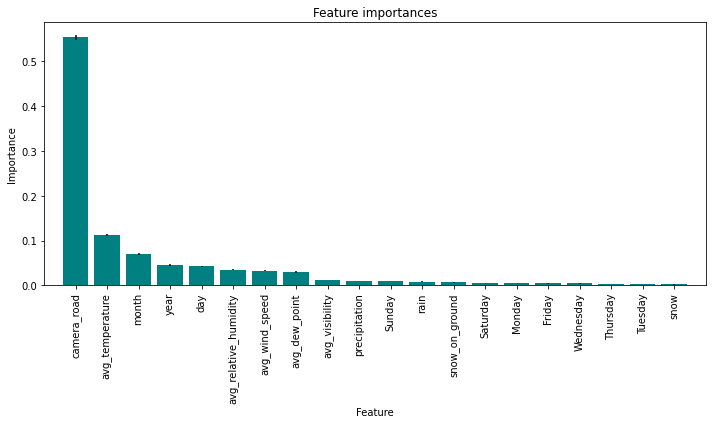

In [17]:
# Get feature importances
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
# Plot feature importances with feature names from DataFrame
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="teal", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# RF RAW 8 Features

In [18]:
# Create a Random Forest Regressor

rf_8 = RandomForestRegressor(n_jobs=-1)

MAEscorer = make_scorer(mean_absolute_error)
cv=KFold(n_splits=5,random_state=1220,shuffle=True)
cross_value_Scores=cross_val_score(rf_8,X_train.iloc[:, indices[:7]],y_train,cv=cv,scoring=MAEscorer, n_jobs=-1)
mean_cv_Score=np.mean(cross_value_Scores)


In [19]:
# Subset your dataset to include only the top 8 features
# Select the top 7 features from X
X_train_subset = X_train.iloc[:, indices[:7]]
# Record start time
start_time = time.time()

randomF = rf_8.fit(X_train_subset,y_train)

end_time = time.time()



In [20]:
# Calculate elapsed time
elapsed_time11 = end_time - start_time
print("Training time rf Raw 8 Features:", elapsed_time11, "seconds")

Training time rf Raw 8 Features: 5.896223783493042 seconds


In [21]:
test_predictions11 = rf_8.predict(X_test.iloc[:, indices[:7]])
mae11 = mean_absolute_error(y_test, test_predictions11)
print("Test MAE rf Raw 8 Features:", mae11)
rae11 = 1-mae11/stat.mean(y)
print("Relative accuracy rf Raw 8 Features = {}".format(rae11))
print("R squared score RF RAW = {}".format(r2_score(y_test, test_predictions11)))

Test MAE rf Raw 8 Features: 93.51834115907525
Relative accuracy rf Raw 8 Features = 0.7679421707586055
R squared score RF RAW = 0.7068904086887374


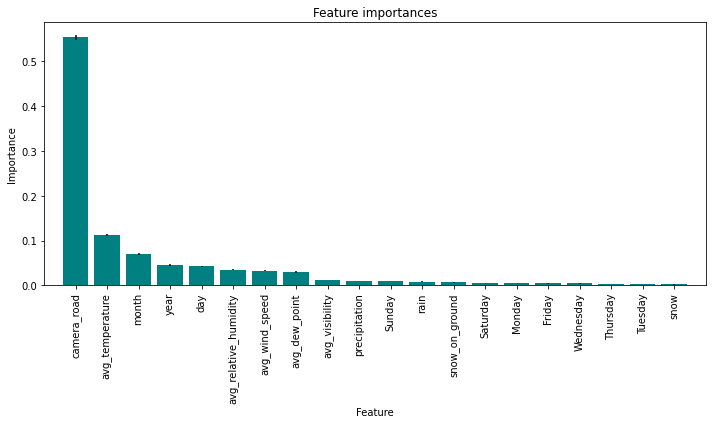

In [22]:
# Get feature importances
importances11 = rf.feature_importances_
std11 = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices11 = np.argsort(importances11)[::-1]
# Plot feature importances with feature names from DataFrame
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="teal", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [109]:
from sklearn.metrics import make_scorer, mean_absolute_error

def plot_learning_curve_mae(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5), figsize=(8, 6)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Mean Absolute Error")
    
    mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)  # Creating MAE scorer
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=mae_scorer)
    
    train_scores_mean = -np.mean(train_scores, axis=1)  # Take negative because scoring function returns negative values for error
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)  # Take negative because scoring function returns negative values for error
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training MAE")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation MAE")

    plt.legend(loc="best")
    plt.show()

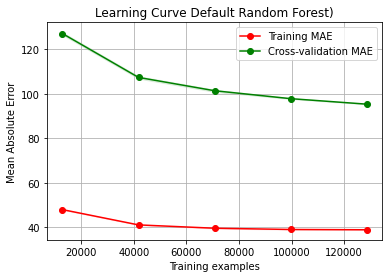

In [112]:
plot_learning_curve_mae(rf_8, "Learning Curve Default Random Forest)", X_train, y_train, cv=5, n_jobs=-1)

# plot_learning_curve(rf_8, "Learning Curve RF Default 8 Feautures", X_train.iloc[:, indices[:7]], y_train, cv=5, n_jobs=-1)

# RF HPO

In [46]:
# from joblib import dump

# Assuming you have trained your Random Forest model and stored it in the variable rf

# Save the trained model to a file
# dump(rf, '/content/drive/My Drive/ML_Project/RandomForest_Model.joblib')
#from joblib import load

# Load the saved model from file
# rf = load('/content/drive/My Drive/ML_Project/RandomForest_Model.joblib')

# Now you can use loaded_model for prediction or further analysis
import pickle

# Save the model using pickle
with open('RandomForest_Model_02.pkl', 'wb') as f:
    pickle.dump(rf, f)

In [ ]:
# Here we used HPO and we tested the case using both all features 
# and 8 features and got them same results just different times The time shown was for the 8 features case but the
# code has been changed back to the all features case
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'log2']
}
start_time_grf = time.time()
# Instantiate GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, 
                              scoring='neg_mean_squared_error',cv=3, verbose=0)
# # Fit the GridSearchCV object to your data
grid_search_rf.fit(X_train, y_train)
end_time_grf = time.time()

In [28]:
# # Get the best parameters and best estimator
best_params = grid_search_rf.best_params_
best_estimator=grid_search_rf.best_estimator_


# Print the best parameters
print("Best Parameters:", best_params)

# Print the best estimator
print("\nBest Estimator:", best_estimator)

Best Parameters: {'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}

Best Estimator: RandomForestRegressor(max_depth=30, min_samples_leaf=2, min_samples_split=10,
                      n_estimators=300, n_jobs=-1)


In [27]:
# Calculate elapsed time
elapsed_time_grf = end_time_grf - start_time_grf
print("HPO Best Parms Time MLP :", elapsed_time_grf, "seconds")
print("HPO Best Parms Time MLP :", elapsed_time_grf/60, "minutes")
print("HPO Best Parms Time MLP :", elapsed_time_grf/(60**2), "hours")

HPO Best Parms Time MLP : 2905.811468601227 seconds
HPO Best Parms Time MLP : 48.43019114335378 minutes
HPO Best Parms Time MLP : 0.8071698523892297 hours


In [29]:
# For when we dont want to use the hpo after loosing our kernel
# hyperparameters = {
#     'max_depth': 30,
#     'max_features': 'auto',
#     'min_samples_leaf': 2,
#     'min_samples_split': 10,
#     'n_estimators': 300,
#     'n_jobs':-1
# }

# # Create Random Forest regressor with specified hyperparameters
# hpo_rf = RandomForestRegressor(**hyperparameters)
# When we have ran the HPO grid
hpo_rf=RandomForestRegressor(**best_params)

In [31]:
# Record start time
start_time2 = time.time()

best_estimator.fit(X_train.iloc[:, indices[:7]], y_train)

end_time2 = time.time()

In [32]:
# Calculate elapsed time
elapsed_time2 = end_time2 - start_time2
print("Training time rf HPO:", elapsed_time2, "seconds")

Training time rf HPO: 13.498893737792969 seconds


In [82]:
# test_predictions_hpo = best_estimator.predict(X_test)
test_predictions_hpo = hpo_rf.predict(X_test)
mae_hpo = mean_absolute_error(y_test, test_predictions_hpo)
print("Test MAE HPO:", mae_hpo)
ra2= 1-mae_hpo/stat.mean(y)
print("Relative accuracy HPO = {}".format(ra2))
print("R squared score RF HPO = {}".format(r2_score(y_test, test_predictions_hpo)))

Test MAE HPO: 91.74057691510527
Relative accuracy HPO = 0.7723535418997691
R squared score RF HPO = 0.7264203016674986


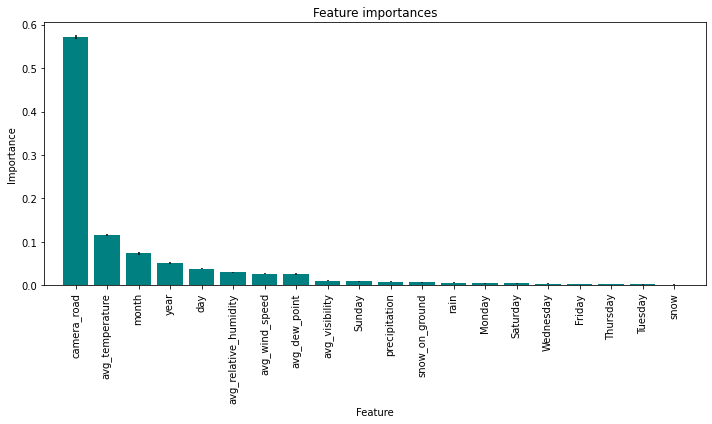

In [85]:
# Get feature importances
importances = hpo_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in hpo_rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
# Plot feature importances with feature names from DataFrame
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="teal", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [102]:
# The parameters were found from changing the columns used in the previous gridsearch
# Both 8 features and all features resulted in the same HPOs but longer finding times
hyperparameters = {
    'max_depth': 30,
    'max_features': 'auto',
    'min_samples_leaf': 2,
    'min_samples_split': 10,
    'n_estimators': 300,
    'n_jobs':-1
}

# Create Random Forest regressor with specified hyperparameters
hpo_rf_8 = RandomForestRegressor(**hyperparameters)

In [103]:
X_train_subset = X_train.iloc[:, indices[:7]]

# Record start time
start_time22 = time.time()

hpo_rf_8.fit(X_train_subset, y_train)

end_time22 = time.time()

In [104]:
# Calculate elapsed time
elapsed_time22 = end_time22 - start_time22
print("Training time rf HPO 8 Feat:", elapsed_time22, "seconds")

Training time rf HPO 8 Feat: 14.273726224899292 seconds


In [105]:
test_predictions_hpo_8 = hpo_rf_8.predict(X_test.iloc[:, indices[:7]])
mae_hpo_8 = mean_absolute_error(y_test, test_predictions_hpo_8)
print("Test MAE RF HPO 8 Feat:", mae_hpo_8)
ra2_8= 1-mae_hpo_8/stat.mean(y)
print("Relative accuracy RF HPO 8 Feat = {}".format(ra2_8))
print("R squared score RF HPO 8 Feat = {}".format(r2_score(y_test, test_predictions_hpo_8)))

Test MAE RF HPO 8 Feat: 92.6946764832607
Relative accuracy RF HPO 8 Feat = 0.769986024769737
R squared score RF HPO 8 Feat = 0.7157000148746564


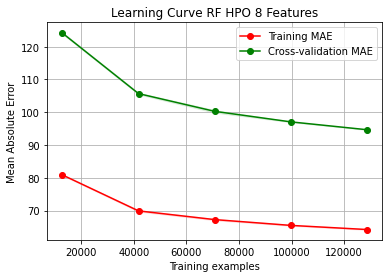

In [111]:
plot_learning_curve_mae(hpo_rf_8, "Learning Curve RF HPO 8 Features", X_train_subset, y_train, cv=5, n_jobs=-1)

In [94]:
plt.show()

In [24]:
# #  Evaluate on the test set
# best_rf = bayes_search.best_estimator_
# test_predictions = rf.predict(X_test)
# mse = mean_absolute_error(y_test, test_predictions)
# print("Test MAE:", mse)

# MLP Model

In [ ]:
# del(df, df_melted, column, column_mean, one_hot_encoded, weather_data, X, y)

In [537]:
#  Using Label
X = merged_dataset.drop(columns=["traffic_volume"])
y = merged_dataset["traffic_volume"]
# Split the data in a 70:30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.6, random_state=42)

In [548]:
import tensorflow.keras.backend as K

def r_squared(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return 1 - SS_res/(SS_tot + K.epsilon())
# Function to create the MLP model
def mlp(input_dim, hidden_layers=1, neurons=50, activation='relu', learning_rate=0.01, loss='mean_absolute_error', l2_penalty=0.01):
    model = Sequential()

    # Check if neurons is an integer for error handling
    if type(neurons) == int and neurons > 0:
        neurons = np.repeat(neurons, hidden_layers)

    # Check if there are hidden layers
    if hidden_layers > 0:
        for i in range(hidden_layers):
            model.add(Dense(units=neurons[i], input_dim=input_dim, activation=activation))#, kernel_regularizer=l2(l2_penalty)))

    model.add(Dense(units=1, activation='linear', kernel_regularizer=l2(l2_penalty)))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss=loss, metrics=[r_squared])
    return model

In [549]:
model2 = mlp(X_train.iloc[:, indices[:7]].shape[1])

In [550]:
model2.summary()

Model: "sequential_426"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1710 (Dense)           (None, 50)                400       
_________________________________________________________________
dense_1711 (Dense)           (None, 1)                 51        
Total params: 451
Trainable params: 451
Non-trainable params: 0
_________________________________________________________________


In [551]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# Record start time
start_time3 = time.time()

history_mlp = model2.fit(X_train.iloc[:, indices[:7]], y_train, epochs=30, batch_size=32, verbose=1, validation_data=(X_val.iloc[:, indices[:7]], y_val), callbacks=[early_stopping])

end_time3 = time.time()

Train on 160744 samples, validate on 27556 samples
Epoch 1/30
160744/160744 [==============================] - 10s 63us/sample - loss: 177.9836 - r_squared: 0.0261 - val_loss: 178.1756 - val_r_squared: 0.0023
Epoch 2/30
160744/160744 [==============================] - 11s 66us/sample - loss: 176.5595 - r_squared: 0.0370 - val_loss: 175.9519 - val_r_squared: 0.0367
Epoch 3/30
160744/160744 [==============================] - 10s 65us/sample - loss: 176.1645 - r_squared: 0.0411 - val_loss: 175.2439 - val_r_squared: 0.0489
Epoch 4/30
160744/160744 [==============================] - 9s 58us/sample - loss: 175.9489 - r_squared: 0.0403 - val_loss: 175.5688 - val_r_squared: 0.0543
Epoch 5/30
160744/160744 [==============================] - 9s 59us/sample - loss: 176.0510 - r_squared: 0.0403 - val_loss: 175.3101 - val_r_squared: 0.0523
Epoch 6/30
160744/160744 [==============================] - 9s 59us/sample - loss: 175.9388 - r_squared: 0.0416 - val_loss: 175.6164 - val_r_squared: 0.0538


In [553]:
# Calculate elapsed time
elapsed_time3 = end_time3 - start_time3
print("Training time MLP Raw:", elapsed_time3, "seconds")

Training time MLP Raw: 59.32467317581177 seconds


In [554]:
print(history_mlp.history.keys())

dict_keys(['loss', 'r_squared', 'val_loss', 'val_r_squared'])


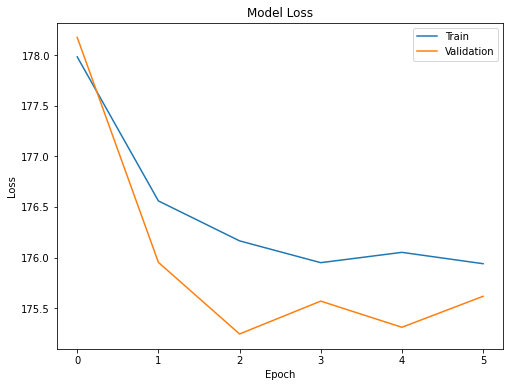

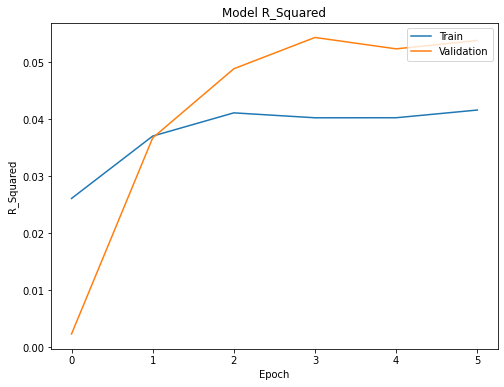

In [555]:

plt.figure(figsize=(8, 6))
plt.plot(history_mlp.history['loss'])
plt.plot(history_mlp.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
# Plot training and validation history
plt.figure(figsize=(8, 6))
plt.plot(history_mlp.history['r_squared'])
plt.plot(history_mlp.history['val_r_squared'])
plt.title('Model R_Squared')
plt.xlabel('Epoch')
plt.ylabel('R_Squared')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [192]:

# Save the model using pickle
# with open('NN_Trained_ModelAcc.pkl', 'wb') as f:
#     pickle.dump(model2, f)

In [556]:
pred_modelraw = model2.predict(X_test.iloc[:, indices[:7]])

In [557]:
mae_model2 = mean_absolute_error(pred_modelraw, y_test)
r1 = r2_score(y_test, pred_modelraw)
print("The MAE for our Sequential Model is: {}".format(mae_model2))
print("The R Squared for our Sequential Model is: {}".format(r1))

The MAE for our Sequential Model is: 174.47095184616376
The R Squared for our Sequential Model is: 0.07564131261318363


In [558]:
meanData = stat.mean(y)
rel_acc_nn = 1-mae_model2/meanData
print("relative Accuracy = {}%".format(rel_acc_nn*100))

relative Accuracy = 56.70651355734443%


In [413]:
# 1
# Define hyperparameter combinations for model2
# Record start time
start_time33 = time.time()
param_grid_model2_opt = {
    'hidden_layers': [1, 2, 3, 4, 5, 6],
    'neurons': [30, 50, 100, 150, 200, 250],
    'activation': ['relu'],
    'learning_rate': [0.012, 0.015, 0.018]
}

# Create KerasRegressor using the mlp function
model2_opt = KerasRegressor(build_fn=mlp, input_dim=X_train.iloc[:, indices[:7]].shape[1], epochs=100, batch_size=32, verbose=0)

# Create GridSearchCV
grid_search_model2_opt = GridSearchCV(estimator=model2_opt, param_grid=param_grid_model2_opt, scoring='neg_mean_squared_error', cv=3)
grid_result_model2_opt = grid_search_model2_opt.fit(X_train.iloc[:, indices[:7]], y_train, validation_data=(X_val.iloc[:, indices[:7]], y_val), verbose=1, callbacks=[early_stopping])

end_time33 = time.time()
# Print the best parameters
print("Best Hyperparameters for Model 2: ", grid_result_model2_opt.best_params_)

ERROR! Session/line number was not unique in database. History logging moved to new session 454
Train on 107162 samples, validate on 27556 samples
Epoch 1/100
107162/107162 [==============================] - 7s 65us/sample - loss: 178.1054 - r_squared: 0.0179 - val_loss: 187.5986 - val_r_squared: -0.1167
Epoch 2/100
107162/107162 [==============================] - 7s 61us/sample - loss: 176.2937 - r_squared: 0.0315 - val_loss: 175.1037 - val_r_squared: 0.0396
Epoch 3/100
107162/107162 [==============================] - 6s 59us/sample - loss: 175.8865 - r_squared: 0.0367 - val_loss: 174.7389 - val_r_squared: 0.0513
Epoch 4/100
107162/107162 [==============================] - 7s 61us/sample - loss: 175.6285 - r_squared: 0.0375 - val_loss: 175.1107 - val_r_squared: 0.0369
Epoch 5/100
107162/107162 [==============================] - 6s 60us/sample - loss: 175.6429 - r_squared: 0.0371 - val_loss: 176.5899 - val_r_squared: 0.0203
Epoch 6/100
107162/107162 [==============================] - 7

107162/107162 [==============================] - 6s 59us/sample - loss: 175.8164 - r_squared: 0.0367 - val_loss: 177.9388 - val_r_squared: 0.0517
Epoch 4/100
107162/107162 [==============================] - 7s 61us/sample - loss: 175.5322 - r_squared: 0.0379 - val_loss: 175.3140 - val_r_squared: 0.0316
Train on 107163 samples, validate on 27556 samples
Epoch 1/100
107163/107163 [==============================] - 7s 64us/sample - loss: 178.7910 - r_squared: 0.0172 - val_loss: 177.0632 - val_r_squared: 0.0161
Epoch 2/100
107163/107163 [==============================] - 7s 64us/sample - loss: 176.9032 - r_squared: 0.0323 - val_loss: 175.0075 - val_r_squared: 0.0472
Epoch 3/100
107163/107163 [==============================] - 7s 61us/sample - loss: 176.5135 - r_squared: 0.0344 - val_loss: 174.9666 - val_r_squared: 0.0434
Epoch 4/100
107163/107163 [==============================] - 6s 60us/sample - loss: 176.4399 - r_squared: 0.0354 - val_loss: 174.9964 - val_r_squared: 0.0579
Epoch 5/100
1

Epoch 3/100
107162/107162 [==============================] - 7s 61us/sample - loss: 175.8520 - r_squared: 0.0375 - val_loss: 174.6162 - val_r_squared: 0.0503
Epoch 4/100
107162/107162 [==============================] - 7s 61us/sample - loss: 175.5661 - r_squared: 0.0389 - val_loss: 174.6767 - val_r_squared: 0.0557
Epoch 5/100
107162/107162 [==============================] - 7s 61us/sample - loss: 175.5698 - r_squared: 0.0382 - val_loss: 175.1450 - val_r_squared: 0.0397
Epoch 6/100
107162/107162 [==============================] - 6s 59us/sample - loss: 175.4382 - r_squared: 0.0395 - val_loss: 174.6692 - val_r_squared: 0.0540
Train on 107163 samples, validate on 27556 samples
Epoch 1/100
107163/107163 [==============================] - 7s 63us/sample - loss: 179.0953 - r_squared: 0.0102 - val_loss: 175.4132 - val_r_squared: 0.0400
Epoch 2/100
107163/107163 [==============================] - 6s 59us/sample - loss: 176.6570 - r_squared: 0.0333 - val_loss: 174.7870 - val_r_squared: 0.0467
E

107163/107163 [==============================] - 6s 60us/sample - loss: 176.5756 - r_squared: 0.0347 - val_loss: 191.9315 - val_r_squared: -0.0515
Train on 107163 samples, validate on 27556 samples
Epoch 1/100
107163/107163 [==============================] - 7s 64us/sample - loss: 180.0795 - r_squared: 0.0069 - val_loss: 175.0415 - val_r_squared: 0.0524
Epoch 2/100
107163/107163 [==============================] - 6s 59us/sample - loss: 177.6983 - r_squared: 0.0286 - val_loss: 176.2609 - val_r_squared: 0.0587
Epoch 3/100
107163/107163 [==============================] - 6s 59us/sample - loss: 176.9796 - r_squared: 0.0365 - val_loss: 174.6212 - val_r_squared: 0.0558
Epoch 4/100
107163/107163 [==============================] - 6s 59us/sample - loss: 177.1134 - r_squared: 0.0330 - val_loss: 174.9319 - val_r_squared: 0.0436
Epoch 5/100
107163/107163 [==============================] - 6s 61us/sample - loss: 177.1590 - r_squared: 0.0317 - val_loss: 174.8248 - val_r_squared: 0.0574
Epoch 6/100


107163/107163 [==============================] - 7s 63us/sample - loss: 180.0054 - r_squared: 0.0064 - val_loss: 175.4890 - val_r_squared: 0.0373
Epoch 2/100
107163/107163 [==============================] - 6s 60us/sample - loss: 177.5126 - r_squared: 0.0297 - val_loss: 175.6029 - val_r_squared: 0.0614
Epoch 3/100
107163/107163 [==============================] - 7s 61us/sample - loss: 177.1439 - r_squared: 0.0337 - val_loss: 183.0828 - val_r_squared: 0.0178
Epoch 4/100
107163/107163 [==============================] - 6s 59us/sample - loss: 177.1072 - r_squared: 0.0347 - val_loss: 176.2031 - val_r_squared: 0.0563
Train on 107162 samples, validate on 27556 samples
Epoch 1/100
107162/107162 [==============================] - 7s 67us/sample - loss: 178.1090 - r_squared: 0.0180 - val_loss: 174.7829 - val_r_squared: 0.0532
Epoch 2/100
107162/107162 [==============================] - 7s 64us/sample - loss: 175.9839 - r_squared: 0.0373 - val_loss: 174.6707 - val_r_squared: 0.0501
Epoch 3/100
1

107163/107163 [==============================] - 7s 65us/sample - loss: 177.0433 - r_squared: 0.0361 - val_loss: 175.2368 - val_r_squared: 0.0381
Epoch 4/100
107163/107163 [==============================] - 7s 64us/sample - loss: 176.7772 - r_squared: 0.0373 - val_loss: 174.9311 - val_r_squared: 0.0593
Epoch 5/100
107163/107163 [==============================] - 7s 65us/sample - loss: 176.8480 - r_squared: 0.0375 - val_loss: 175.1901 - val_r_squared: 0.0584
Train on 107162 samples, validate on 27556 samples
Epoch 1/100
107162/107162 [==============================] - 7s 67us/sample - loss: 179.9442 - r_squared: -0.0174 - val_loss: 181.1432 - val_r_squared: 0.0300
Epoch 2/100
107162/107162 [==============================] - 7s 63us/sample - loss: 176.5046 - r_squared: 0.0296 - val_loss: 178.0770 - val_r_squared: 0.0496
Epoch 3/100
107162/107162 [==============================] - 7s 63us/sample - loss: 176.0296 - r_squared: 0.0334 - val_loss: 174.6964 - val_r_squared: 0.0512
Epoch 4/100


107163/107163 [==============================] - 7s 64us/sample - loss: 176.4941 - r_squared: 0.0324 - val_loss: 174.9057 - val_r_squared: 0.0445
Epoch 7/100
107163/107163 [==============================] - 7s 63us/sample - loss: 176.4130 - r_squared: 0.0346 - val_loss: 176.6435 - val_r_squared: 0.0168
Epoch 8/100
107163/107163 [==============================] - 7s 64us/sample - loss: 176.5568 - r_squared: 0.0322 - val_loss: 174.8106 - val_r_squared: 0.0465
Epoch 9/100
107163/107163 [==============================] - 7s 63us/sample - loss: 176.4386 - r_squared: 0.0339 - val_loss: 175.1617 - val_r_squared: 0.0585
Epoch 10/100
107163/107163 [==============================] - 7s 64us/sample - loss: 176.4368 - r_squared: 0.0335 - val_loss: 175.3496 - val_r_squared: 0.0605
Epoch 11/100
107163/107163 [==============================] - 7s 64us/sample - loss: 176.5201 - r_squared: 0.0328 - val_loss: 175.1661 - val_r_squared: 0.0564
Train on 107163 samples, validate on 27556 samples
Epoch 1/100

107163/107163 [==============================] - 7s 64us/sample - loss: 177.3604 - r_squared: 0.0334 - val_loss: 174.8721 - val_r_squared: 0.0449
Epoch 4/100
107163/107163 [==============================] - 7s 65us/sample - loss: 177.4235 - r_squared: 0.0305 - val_loss: 176.5619 - val_r_squared: 0.0194
Epoch 5/100
107163/107163 [==============================] - 7s 64us/sample - loss: 177.0618 - r_squared: 0.0328 - val_loss: 174.9465 - val_r_squared: 0.0592
Epoch 6/100
107163/107163 [==============================] - 7s 64us/sample - loss: 177.3523 - r_squared: 0.0320 - val_loss: 176.3511 - val_r_squared: 0.0567
Train on 107162 samples, validate on 27556 samples
Epoch 1/100
107162/107162 [==============================] - 7s 67us/sample - loss: 180.0122 - r_squared: -0.0117 - val_loss: 177.3486 - val_r_squared: 0.0529
Epoch 2/100
107162/107162 [==============================] - 7s 64us/sample - loss: 176.6204 - r_squared: 0.0301 - val_loss: 174.7663 - val_r_squared: 0.0535
Epoch 3/100


Train on 107162 samples, validate on 27556 samples
Epoch 1/100
107162/107162 [==============================] - 7s 69us/sample - loss: 180.5638 - r_squared: -0.0570 - val_loss: 183.4712 - val_r_squared: -0.0651
Epoch 2/100
107162/107162 [==============================] - 7s 64us/sample - loss: 176.5732 - r_squared: 0.0311 - val_loss: 175.2914 - val_r_squared: 0.0571
Epoch 3/100
107162/107162 [==============================] - 7s 65us/sample - loss: 176.1859 - r_squared: 0.0349 - val_loss: 174.6556 - val_r_squared: 0.0481
Epoch 4/100
107162/107162 [==============================] - 7s 65us/sample - loss: 175.7320 - r_squared: 0.0371 - val_loss: 174.7321 - val_r_squared: 0.0568
Epoch 5/100
107162/107162 [==============================] - 7s 65us/sample - loss: 175.7855 - r_squared: 0.0353 - val_loss: 174.6699 - val_r_squared: 0.0544
Epoch 6/100
107162/107162 [==============================] - 7s 65us/sample - loss: 176.0196 - r_squared: 0.0350 - val_loss: 177.0364 - val_r_squared: 0.0097

107163/107163 [==============================] - 7s 65us/sample - loss: 177.0600 - r_squared: 0.0331 - val_loss: 174.6982 - val_r_squared: 0.0480
Epoch 7/100
107163/107163 [==============================] - 7s 66us/sample - loss: 176.8379 - r_squared: 0.0357 - val_loss: 175.3665 - val_r_squared: 0.0599
Train on 107162 samples, validate on 27556 samples
Epoch 1/100
107162/107162 [==============================] - 8s 71us/sample - loss: 180.0690 - r_squared: -0.0089 - val_loss: 176.2306 - val_r_squared: 0.0273
Epoch 2/100
107162/107162 [==============================] - 7s 70us/sample - loss: 177.0009 - r_squared: 0.0255 - val_loss: 175.2462 - val_r_squared: 0.0605
Epoch 3/100
107162/107162 [==============================] - 7s 69us/sample - loss: 176.2649 - r_squared: 0.0341 - val_loss: 174.7904 - val_r_squared: 0.0475
Epoch 4/100
107162/107162 [==============================] - 7s 69us/sample - loss: 175.8665 - r_squared: 0.0365 - val_loss: 174.6996 - val_r_squared: 0.0568
Epoch 5/100


107163/107163 [==============================] - 7s 67us/sample - loss: 177.0575 - r_squared: 0.0338 - val_loss: 176.8123 - val_r_squared: 0.0153
Epoch 18/100
107163/107163 [==============================] - 7s 67us/sample - loss: 177.0922 - r_squared: 0.0326 - val_loss: 174.6542 - val_r_squared: 0.0469
Epoch 19/100
107163/107163 [==============================] - 7s 67us/sample - loss: 176.8725 - r_squared: 0.0348 - val_loss: 174.6487 - val_r_squared: 0.0540
Epoch 20/100
107163/107163 [==============================] - 7s 67us/sample - loss: 176.9942 - r_squared: 0.0323 - val_loss: 174.8153 - val_r_squared: 0.0469
Epoch 21/100
107163/107163 [==============================] - 7s 68us/sample - loss: 177.2362 - r_squared: 0.0321 - val_loss: 174.7290 - val_r_squared: 0.0508
Epoch 22/100
107163/107163 [==============================] - 7s 66us/sample - loss: 177.0273 - r_squared: 0.0342 - val_loss: 175.9075 - val_r_squared: 0.0585
Train on 107162 samples, validate on 27556 samples
Epoch 1/

107163/107163 [==============================] - 8s 72us/sample - loss: 182.2945 - r_squared: -0.0929 - val_loss: 175.9654 - val_r_squared: 0.0280
Epoch 2/100
107163/107163 [==============================] - 7s 65us/sample - loss: 177.7630 - r_squared: 0.0216 - val_loss: 175.1029 - val_r_squared: 0.0561
Epoch 3/100
107163/107163 [==============================] - 7s 66us/sample - loss: 177.1999 - r_squared: 0.0288 - val_loss: 178.3120 - val_r_squared: 0.0468
Epoch 4/100
107163/107163 [==============================] - 7s 66us/sample - loss: 176.9635 - r_squared: 0.0304 - val_loss: 175.8351 - val_r_squared: 0.0289
Epoch 5/100
107163/107163 [==============================] - 7s 66us/sample - loss: 176.9896 - r_squared: 0.0274 - val_loss: 175.2301 - val_r_squared: 0.0354
Train on 107163 samples, validate on 27556 samples
Epoch 1/100
107163/107163 [==============================] - 8s 70us/sample - loss: 182.3548 - r_squared: -0.0368 - val_loss: 174.7907 - val_r_squared: 0.0567
Epoch 2/100

107162/107162 [==============================] - 7s 67us/sample - loss: 176.5476 - r_squared: 0.0290 - val_loss: 175.6957 - val_r_squared: 0.0339
Epoch 4/100
107162/107162 [==============================] - 7s 67us/sample - loss: 176.2375 - r_squared: 0.0339 - val_loss: 175.6859 - val_r_squared: 0.0347
Epoch 5/100
107162/107162 [==============================] - 7s 67us/sample - loss: 176.2948 - r_squared: 0.0306 - val_loss: 180.1436 - val_r_squared: -0.0273
Epoch 6/100
107162/107162 [==============================] - 7s 68us/sample - loss: 176.3468 - r_squared: 0.0321 - val_loss: 176.0083 - val_r_squared: 0.0563
Epoch 7/100
107162/107162 [==============================] - 7s 68us/sample - loss: 175.9297 - r_squared: 0.0336 - val_loss: 177.1680 - val_r_squared: 0.0547
Train on 107163 samples, validate on 27556 samples
Epoch 1/100
107163/107163 [==============================] - 8s 71us/sample - loss: 182.6898 - r_squared: -0.1802 - val_loss: 174.9216 - val_r_squared: 0.0477
Epoch 2/100

107162/107162 [==============================] - 8s 75us/sample - loss: 180.9313 - r_squared: -0.0159 - val_loss: 176.1105 - val_r_squared: 0.0591
Epoch 2/100
107162/107162 [==============================] - 8s 72us/sample - loss: 177.2610 - r_squared: 0.0229 - val_loss: 175.0335 - val_r_squared: 0.0580
Epoch 3/100
107162/107162 [==============================] - 8s 72us/sample - loss: 176.5460 - r_squared: 0.0301 - val_loss: 175.3302 - val_r_squared: 0.0607
Epoch 4/100
107162/107162 [==============================] - 8s 72us/sample - loss: 176.7160 - r_squared: 0.0277 - val_loss: 177.3820 - val_r_squared: 0.0094
Epoch 5/100
107162/107162 [==============================] - 8s 72us/sample - loss: 176.3106 - r_squared: 0.0318 - val_loss: 174.6980 - val_r_squared: 0.0547
Epoch 6/100
107162/107162 [==============================] - 8s 72us/sample - loss: 176.2793 - r_squared: 0.0294 - val_loss: 176.8091 - val_r_squared: 0.0543
Epoch 7/100
107162/107162 [==============================] - 8s

107162/107162 [==============================] - 8s 77us/sample - loss: 181.4327 - r_squared: -0.0294 - val_loss: 177.1184 - val_r_squared: 0.0516
Epoch 2/100
107162/107162 [==============================] - 8s 75us/sample - loss: 177.6010 - r_squared: 0.0209 - val_loss: 179.5001 - val_r_squared: 0.0423
Epoch 3/100
107162/107162 [==============================] - 8s 73us/sample - loss: 176.7123 - r_squared: 0.0301 - val_loss: 175.0663 - val_r_squared: 0.0595
Epoch 4/100
107162/107162 [==============================] - 8s 74us/sample - loss: 176.7923 - r_squared: 0.0262 - val_loss: 175.3627 - val_r_squared: 0.0598
Epoch 5/100
107162/107162 [==============================] - 8s 74us/sample - loss: 176.2579 - r_squared: 0.0303 - val_loss: 179.5320 - val_r_squared: 0.0390
Epoch 6/100
107162/107162 [==============================] - 8s 74us/sample - loss: 176.0358 - r_squared: 0.0337 - val_loss: 175.7702 - val_r_squared: 0.0308
Train on 107163 samples, validate on 27556 samples
Epoch 1/100


107162/107162 [==============================] - 8s 74us/sample - loss: 179.8658 - r_squared: -3.5570e-06 - val_loss: 176.6693 - val_r_squared: 0.0206
Epoch 2/100
107162/107162 [==============================] - 8s 71us/sample - loss: 177.2005 - r_squared: 0.0256 - val_loss: 175.2198 - val_r_squared: 0.0609
Epoch 3/100
107162/107162 [==============================] - 8s 72us/sample - loss: 176.6181 - r_squared: 0.0280 - val_loss: 175.0236 - val_r_squared: 0.0582
Epoch 4/100
107162/107162 [==============================] - 8s 71us/sample - loss: 176.4527 - r_squared: 0.0315 - val_loss: 174.8170 - val_r_squared: 0.0593
Epoch 5/100
107162/107162 [==============================] - 8s 72us/sample - loss: 176.2388 - r_squared: 0.0310 - val_loss: 177.5901 - val_r_squared: 0.0508
Epoch 6/100
107162/107162 [==============================] - 8s 70us/sample - loss: 176.4615 - r_squared: 0.0292 - val_loss: 177.9087 - val_r_squared: 0.0035
Epoch 7/100
107162/107162 [==============================] 

Epoch 2/100
107162/107162 [==============================] - 8s 73us/sample - loss: 177.5234 - r_squared: 0.0207 - val_loss: 177.8252 - val_r_squared: 0.0498
Epoch 3/100
107162/107162 [==============================] - 8s 73us/sample - loss: 176.9694 - r_squared: 0.0249 - val_loss: 175.3121 - val_r_squared: 0.0438
Epoch 4/100
107162/107162 [==============================] - 8s 74us/sample - loss: 176.4641 - r_squared: 0.0302 - val_loss: 184.4006 - val_r_squared: -0.0746
Epoch 5/100
107162/107162 [==============================] - 8s 75us/sample - loss: 176.3836 - r_squared: 0.0317 - val_loss: 175.7960 - val_r_squared: 0.0582
Epoch 6/100
107162/107162 [==============================] - 8s 74us/sample - loss: 176.3660 - r_squared: 0.0334 - val_loss: 179.6147 - val_r_squared: -0.0192
Train on 107163 samples, validate on 27556 samples
Epoch 1/100
107163/107163 [==============================] - 8s 76us/sample - loss: 181.7976 - r_squared: -0.0411 - val_loss: 175.4465 - val_r_squared: 0.045

107163/107163 [==============================] - 8s 79us/sample - loss: 182.0524 - r_squared: -0.0224 - val_loss: 177.3463 - val_r_squared: 0.0099
Epoch 2/100
107163/107163 [==============================] - 8s 76us/sample - loss: 178.6073 - r_squared: 0.0162 - val_loss: 175.1706 - val_r_squared: 0.0580
Epoch 3/100
107163/107163 [==============================] - 8s 75us/sample - loss: 177.6783 - r_squared: 0.0236 - val_loss: 174.7960 - val_r_squared: 0.0442
Epoch 4/100
107163/107163 [==============================] - 8s 77us/sample - loss: 177.1698 - r_squared: 0.0291 - val_loss: 177.3746 - val_r_squared: 0.0084
Epoch 5/100
107163/107163 [==============================] - 8s 74us/sample - loss: 177.0630 - r_squared: 0.0283 - val_loss: 176.4140 - val_r_squared: 0.0229
Epoch 6/100
107163/107163 [==============================] - 8s 76us/sample - loss: 176.8314 - r_squared: 0.0283 - val_loss: 174.8021 - val_r_squared: 0.0564
Train on 107163 samples, validate on 27556 samples
Epoch 1/100


Train on 107162 samples, validate on 27556 samples
Epoch 1/100
107162/107162 [==============================] - 9s 80us/sample - loss: 180.9566 - r_squared: -0.0146 - val_loss: 178.6625 - val_r_squared: 0.0432
Epoch 2/100
107162/107162 [==============================] - 8s 72us/sample - loss: 177.3917 - r_squared: 0.0225 - val_loss: 176.8171 - val_r_squared: 0.0152
Epoch 3/100
107162/107162 [==============================] - 8s 74us/sample - loss: 177.1370 - r_squared: 0.0239 - val_loss: 175.1277 - val_r_squared: 0.0397
Epoch 4/100
107162/107162 [==============================] - 8s 74us/sample - loss: 176.6130 - r_squared: 0.0289 - val_loss: 181.5228 - val_r_squared: -0.0427
Epoch 5/100
107162/107162 [==============================] - 8s 75us/sample - loss: 176.1894 - r_squared: 0.0326 - val_loss: 176.5647 - val_r_squared: 0.0179
Epoch 6/100
107162/107162 [==============================] - 8s 74us/sample - loss: 176.3268 - r_squared: 0.0308 - val_loss: 174.6499 - val_r_squared: 0.0537

107163/107163 [==============================] - 9s 81us/sample - loss: 186.3526 - r_squared: -0.5999 - val_loss: 185.7410 - val_r_squared: -0.0016
Epoch 2/100
107163/107163 [==============================] - 8s 76us/sample - loss: 179.3736 - r_squared: 0.0116 - val_loss: 177.3426 - val_r_squared: 0.0091
Epoch 3/100
107163/107163 [==============================] - 8s 77us/sample - loss: 178.4537 - r_squared: 0.0217 - val_loss: 176.3605 - val_r_squared: 0.0221
Epoch 4/100
107163/107163 [==============================] - 8s 76us/sample - loss: 178.0160 - r_squared: 0.0254 - val_loss: 175.0788 - val_r_squared: 0.0537
Epoch 5/100
107163/107163 [==============================] - 8s 77us/sample - loss: 177.6667 - r_squared: 0.0289 - val_loss: 174.8427 - val_r_squared: 0.0448
Epoch 6/100
107163/107163 [==============================] - 8s 77us/sample - loss: 177.6305 - r_squared: 0.0278 - val_loss: 175.2097 - val_r_squared: 0.0584
Epoch 7/100
107163/107163 [==============================] - 8

107163/107163 [==============================] - 8s 77us/sample - loss: 178.6744 - r_squared: 0.0195 - val_loss: 174.7340 - val_r_squared: 0.0534
Epoch 4/100
107163/107163 [==============================] - 8s 76us/sample - loss: 178.0644 - r_squared: 0.0242 - val_loss: 174.7543 - val_r_squared: 0.0574
Epoch 5/100
107163/107163 [==============================] - 8s 77us/sample - loss: 177.7987 - r_squared: 0.0261 - val_loss: 176.0497 - val_r_squared: 0.0251
Epoch 6/100
107163/107163 [==============================] - 8s 77us/sample - loss: 177.7532 - r_squared: 0.0282 - val_loss: 182.1941 - val_r_squared: -0.0499
Train on 107162 samples, validate on 27556 samples
Epoch 1/100
107162/107162 [==============================] - 9s 80us/sample - loss: 185.7589 - r_squared: -1.0514 - val_loss: 177.4577 - val_r_squared: 0.0519
Epoch 2/100
107162/107162 [==============================] - 8s 77us/sample - loss: 177.6710 - r_squared: 0.0197 - val_loss: 174.8255 - val_r_squared: 0.0562
Epoch 3/100

Train on 107162 samples, validate on 27556 samples
Epoch 1/100
107162/107162 [==============================] - 9s 82us/sample - loss: 181.9311 - r_squared: -0.0272 - val_loss: 175.2796 - val_r_squared: 0.0409
Epoch 2/100
107162/107162 [==============================] - 8s 77us/sample - loss: 178.0619 - r_squared: 0.0148 - val_loss: 186.9603 - val_r_squared: -0.0109
Epoch 3/100
107162/107162 [==============================] - 8s 78us/sample - loss: 177.2877 - r_squared: 0.0234 - val_loss: 179.7003 - val_r_squared: 0.0395
Epoch 4/100
107162/107162 [==============================] - 8s 77us/sample - loss: 176.9013 - r_squared: 0.0270 - val_loss: 175.1246 - val_r_squared: 0.0418
Epoch 5/100
107162/107162 [==============================] - 8s 79us/sample - loss: 176.3008 - r_squared: 0.0297 - val_loss: 175.1719 - val_r_squared: 0.0383
Epoch 6/100
107162/107162 [==============================] - 8s 77us/sample - loss: 176.2642 - r_squared: 0.0288 - val_loss: 175.0079 - val_r_squared: 0.0418

Epoch 7/100
107163/107163 [==============================] - 9s 81us/sample - loss: 177.1909 - r_squared: 0.0264 - val_loss: 176.2076 - val_r_squared: 0.0579
Train on 107163 samples, validate on 27556 samples
Epoch 1/100
107163/107163 [==============================] - 9s 88us/sample - loss: 185.0364 - r_squared: -0.0689 - val_loss: 176.3149 - val_r_squared: 0.0540
Epoch 2/100
107163/107163 [==============================] - 9s 80us/sample - loss: 179.3287 - r_squared: 0.0116 - val_loss: 176.2664 - val_r_squared: 0.0560
Epoch 3/100
107163/107163 [==============================] - 9s 81us/sample - loss: 178.6030 - r_squared: 0.0188 - val_loss: 175.0720 - val_r_squared: 0.0607
Epoch 4/100
107163/107163 [==============================] - 9s 81us/sample - loss: 178.1079 - r_squared: 0.0242 - val_loss: 176.7281 - val_r_squared: 0.0157
Epoch 5/100
107163/107163 [==============================] - 9s 81us/sample - loss: 177.9894 - r_squared: 0.0258 - val_loss: 177.8529 - val_r_squared: 0.0501


107163/107163 [==============================] - 9s 86us/sample - loss: 186.3115 - r_squared: -0.4129 - val_loss: 180.1715 - val_r_squared: -0.0262
Epoch 2/100
107163/107163 [==============================] - 9s 82us/sample - loss: 179.0286 - r_squared: 0.0106 - val_loss: 182.8696 - val_r_squared: -0.0567
Epoch 3/100
107163/107163 [==============================] - 9s 81us/sample - loss: 178.0303 - r_squared: 0.0187 - val_loss: 176.0533 - val_r_squared: 0.0607
Epoch 4/100
107163/107163 [==============================] - 9s 82us/sample - loss: 178.0814 - r_squared: 0.0202 - val_loss: 174.6807 - val_r_squared: 0.0558
Epoch 5/100
107163/107163 [==============================] - 9s 82us/sample - loss: 177.2223 - r_squared: 0.0267 - val_loss: 178.5536 - val_r_squared: 0.0142
Epoch 6/100
107163/107163 [==============================] - 9s 82us/sample - loss: 177.0458 - r_squared: 0.0300 - val_loss: 173.9686 - val_r_squared: 0.0566
Epoch 7/100
107163/107163 [==============================] - 

Epoch 5/100
107163/107163 [==============================] - 8s 78us/sample - loss: 178.2822 - r_squared: 0.0164 - val_loss: 179.0342 - val_r_squared: -0.0119
Train on 107163 samples, validate on 27556 samples
Epoch 1/100
107163/107163 [==============================] - 9s 81us/sample - loss: 182.5874 - r_squared: -0.0185 - val_loss: 190.1419 - val_r_squared: -0.0300
Epoch 2/100
107163/107163 [==============================] - 8s 79us/sample - loss: 179.7531 - r_squared: 0.0093 - val_loss: 191.7521 - val_r_squared: -0.1633
Epoch 3/100
107163/107163 [==============================] - 8s 78us/sample - loss: 178.5920 - r_squared: 0.0205 - val_loss: 175.5407 - val_r_squared: 0.0608
Epoch 4/100
107163/107163 [==============================] - 8s 78us/sample - loss: 178.1145 - r_squared: 0.0236 - val_loss: 176.8096 - val_r_squared: 0.0535
Epoch 5/100
107163/107163 [==============================] - 8s 78us/sample - loss: 178.5201 - r_squared: 0.0227 - val_loss: 185.0105 - val_r_squared: 0.00

107163/107163 [==============================] - 9s 85us/sample - loss: 184.8318 - r_squared: -0.1327 - val_loss: 176.3297 - val_r_squared: 0.0591
Epoch 2/100
107163/107163 [==============================] - 9s 83us/sample - loss: 179.0464 - r_squared: 0.0106 - val_loss: 175.1611 - val_r_squared: 0.0603
Epoch 3/100
107163/107163 [==============================] - 9s 82us/sample - loss: 178.3390 - r_squared: 0.0172 - val_loss: 178.0769 - val_r_squared: 0.0062
Epoch 4/100
107163/107163 [==============================] - 9s 82us/sample - loss: 178.0984 - r_squared: 0.0175 - val_loss: 174.8037 - val_r_squared: 0.0492
Epoch 5/100
107163/107163 [==============================] - 9s 84us/sample - loss: 177.2677 - r_squared: 0.0277 - val_loss: 177.9072 - val_r_squared: 0.0025
Epoch 6/100
107163/107163 [==============================] - 9s 84us/sample - loss: 177.0667 - r_squared: 0.0284 - val_loss: 178.8101 - val_r_squared: -0.0021
Epoch 7/100
107163/107163 [==============================] - 9

In [417]:
# Calculate elapsed time
elapsed_time33 = end_time33 - start_time33
print("HPO Best Parms Time MLP :", elapsed_time33, "seconds")
print("HPO Best Parms Time MLP :", elapsed_time33/60, "minutes")
print("HPO Best Parms Time MLP :", elapsed_time33/(60**2), "hours")

HPO Best Parms Time MLP : 16816.263113975525 seconds
HPO Best Parms Time MLP : 280.27105189959207 minutes
HPO Best Parms Time MLP : 4.671184198326535 hours


In [559]:
# # Retrain model2_opt with the optimized hyperparameters
best_model2_opt = mlp(X_train.iloc[:, indices[:7]].shape[1], **grid_result_model2_opt.best_params_)
# hyperparameters = {'activation': 'relu', 'hidden_layers': 7, 'learning_rate': 0.001, 'neurons': 200}
# best_model2_opt = mlp(X_train.shape[1], **hyperparameters)
best_model2_opt.summary()

Model: "sequential_427"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1712 (Dense)           (None, 100)               800       
_________________________________________________________________
dense_1713 (Dense)           (None, 100)               10100     
_________________________________________________________________
dense_1714 (Dense)           (None, 100)               10100     
_________________________________________________________________
dense_1715 (Dense)           (None, 1)                 101       
Total params: 21,101
Trainable params: 21,101
Non-trainable params: 0
_________________________________________________________________


In [560]:
# Record start time
start_time4 = time.time()

hist_HPO_NN = best_model2_opt.fit(X_train.iloc[:, indices[:7]], y_train, validation_data=(X_val.iloc[:, indices[:7]], y_val), epochs = 100, verbose=1, callbacks=[early_stopping])
end_time4 = time.time()

Train on 160744 samples, validate on 27556 samples
Epoch 1/100
160744/160744 [==============================] - 11s 68us/sample - loss: 179.6731 - r_squared: 0.0092 - val_loss: 176.8304 - val_r_squared: 0.0225
Epoch 2/100
160744/160744 [==============================] - 10s 64us/sample - loss: 177.3109 - r_squared: 0.0285 - val_loss: 179.0594 - val_r_squared: 0.0413
Epoch 3/100
160744/160744 [==============================] - 10s 64us/sample - loss: 177.1559 - r_squared: 0.0312 - val_loss: 178.0364 - val_r_squared: -7.5294e-04
Epoch 4/100
160744/160744 [==============================] - 11s 65us/sample - loss: 176.7983 - r_squared: 0.0328 - val_loss: 175.5353 - val_r_squared: 0.0369
Epoch 5/100
160744/160744 [==============================] - 10s 64us/sample - loss: 176.8841 - r_squared: 0.0334 - val_loss: 175.9296 - val_r_squared: 0.0536
Epoch 6/100
160744/160744 [==============================] - 10s 64us/sample - loss: 176.6274 - r_squared: 0.0344 - val_loss: 176.5027 - val_r_square

In [561]:
# Calculate elapsed time
elapsed_time4 = end_time4 - start_time4
print("Training time MLP HPO:", elapsed_time4, "seconds")
print("Training time MLP HPO:", elapsed_time4/60, "minutes")


Training time MLP HPO: 114.43768501281738 seconds
Training time MLP HPO: 1.907294750213623 minutes


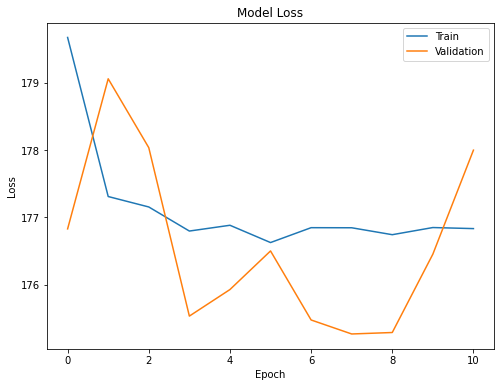

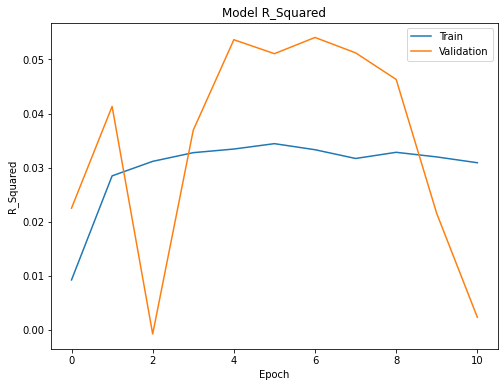

In [562]:

plt.figure(figsize=(8, 6))
plt.plot(hist_HPO_NN.history['loss'])
plt.plot(hist_HPO_NN.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
# Plot training and validation history
plt.figure(figsize=(8, 6))
plt.plot(hist_HPO_NN.history['r_squared'])
plt.plot(hist_HPO_NN.history['val_r_squared'])
plt.title('Model R_Squared')
plt.xlabel('Epoch')
plt.ylabel('R_Squared')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [563]:
# # Evaluate the performance of the retrained model2_raw on the test set
# y_pred_NN = model2.predict(np.asarray(X_test).astype(np.float32))
mae_model2 = mean_absolute_error(y_test, pred_modelraw)
r1 = r2_score(y_test, pred_modelraw)
print("NN Raw - MAE: {:.4f}".format(mae_model2))
print("The R Squared for our Sequential Model 2 RAW is: {}".format(r1))
# Evaluate the performance of the retrained model2_opt on the test set
y_pred_ml2 = best_model2_opt.predict(X_test.iloc[:, indices[:7]])
mae_model2_opt = mean_absolute_error(y_test, y_pred_ml2)
r2 = r2_score(y_test, y_pred_ml2)
print("Model 2 HPO - MAE: {:.4f}".format(mae_model2_opt))
print("The R Squared for our Sequential Model 2 Opt is: {}".format(r2))

NN Raw - MAE: 174.4710
The R Squared for our Sequential Model 2 RAW is: 0.07564131261318363
Model 2 HPO - MAE: 174.5596
The R Squared for our Sequential Model 2 Opt is: 0.07952560013246035


In [ ]:
# model2_opt.save('./NN_HPO_Trained_Model.h5')  # Export the trained model to drive

# Save the model using pickle
with open('NN_HPO_Trained_Model02.pkl', 'wb') as f:
    pickle.dump(best_model2_opt, f)

In [564]:
meanData = stat.mean(y)

rel_acc_nn = 1-mae_model2/meanData
print("relative Accuracy = {}%".format(rel_acc_nn*100))
rel_acc_nn_hpo = 1-mae_model2_opt/meanData
print("relative Accuracy = {}%".format(rel_acc_nn_hpo*100))

relative Accuracy = 56.70651355734443%
relative Accuracy = 56.68451300752875%


# Plots

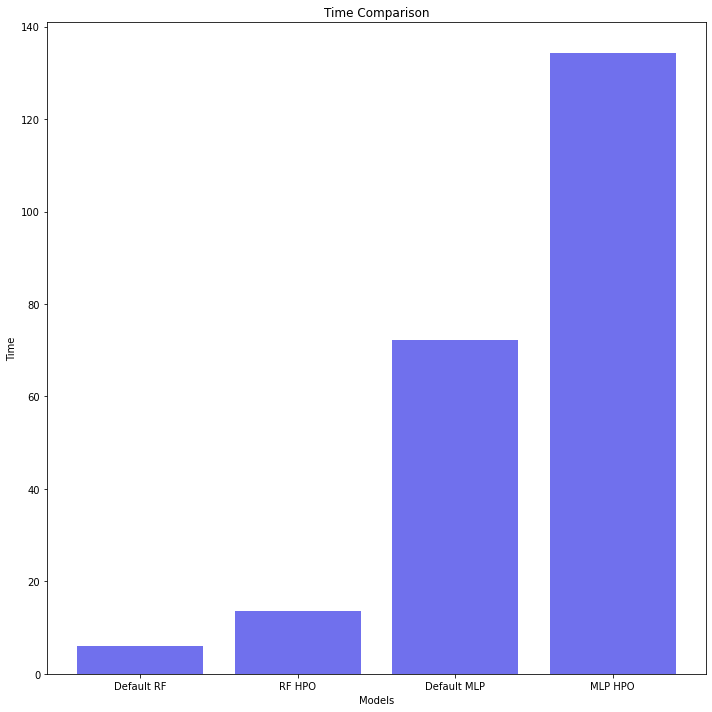

In [79]:
# Model names
models = ['Default RF', 'RF HPO', 'Default MLP', 'MLP HPO']
# Mean Absolute Error (MAE) values for each model
mae_values = [6.058861970901489, 13.518038272857666, 72.25079298019409, 134.1976237297058]  # The kernel was restarted but the values were recorded for this purpose

# Plotting
plt.figure(figsize=(10, 10))
plt.bar(models, mae_values, color=(0.2, 0.2, 0.9, 0.7) )
plt.title('Time Comparison')
plt.ylabel('Time')
plt.xlabel('Models')


# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

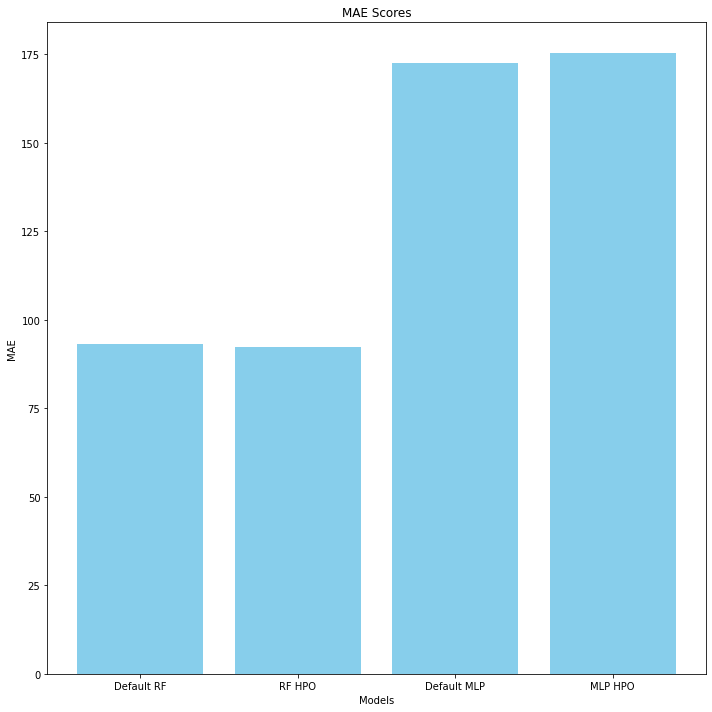

In [80]:
# Model names
models = ['Default RF', 'RF HPO', 'Default MLP', 'MLP HPO']
# Mean Absolute Error (MAE) values for each model
mae_values = [93.29422120108839, 92.22553720752299, 172.5487005329532, 175.3050]  # The kernel was restarted but the values were recorded for this purpose

# Plotting
plt.figure(figsize=(10, 10))
plt.bar(models, mae_values, color='skyblue')
plt.title('MAE Scores')
plt.ylabel('MAE')
plt.xlabel('Models')


# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

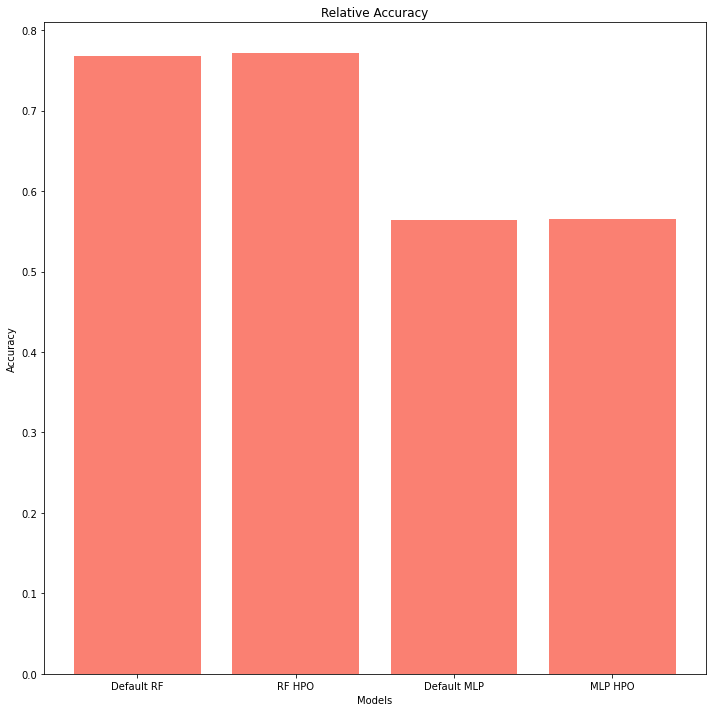

In [81]:
# Model names
models = ['Default RF', 'RF HPO', 'Default MLP', 'MLP HPO']# Relative Accuracy values for each model
relative_accuracy = [ 0.7684983054194164, 0.771150154079456,  0.5640090505005797, 0.5649954744160879]  # Replace with your actual accuracy values

# Plotting
plt.figure(figsize=(10, 10))
plt.bar(models, relative_accuracy, color='salmon')
plt.title('Relative Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Models')


# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

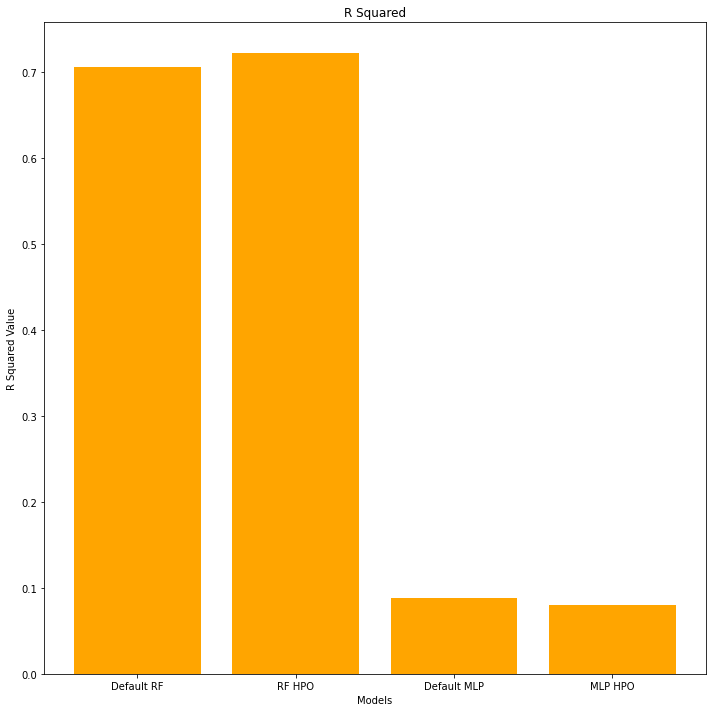

In [82]:
# Model names
models = ['Default RF', 'RF HPO', 'Default MLP', 'MLP HPO']
# R score
R22 = [ 0.7056858277959392, 0.721899188333389, 0.08786772508564933, 0.08053430619356339]  

# Plotting
plt.figure(figsize=(10, 10))
plt.bar(models, R22, color='Orange')
plt.title('R Squared')
plt.ylabel('R Squared Value')
plt.xlabel('Models')


# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [544]:
print(mae)
# # Plot training history
# def plot_history(history_list, model_name):
#     plt.figure(figsize=(12, 6))
    
#     for i, history in enumerate(history_list, 1):
#         plt.subplot(1, 3, i)
#         plt.plot(history['loss'], label='Train')
#         plt.plot(history['val_loss'], label='Validation')
#         plt.title(f'{model_name} - Fold {i}')
#         plt.xlabel('Epochs')
#         plt.ylabel('Loss')
#         plt.legend()
    
#     plt.tight_layout()
#     plt.show()
    
# # Plot history for Model 1
# plot_history(hist_NN_HPO_history, 'NN HPO Model')

# # Plot history for Model 2
# plot_history(hist_NN, 'NN Model')

# plot_history(randomF, 'Random Forest Model')

# plot_history(hpo_rfhist, 'Random Forest HPO Model')

93.36716974453986
